MTA Metro Data

*   Data Source:
https://data.ny.gov/Transportation/MTA-Subway-Hourly-Ridership-Beginning-February-202/wujg-7c2s




# Exlorarity Data Analysis

In [1]:
# Importing dictionaries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metro = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv')
metro.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference
0,08/17/2023 08:00:00 PM,R180,157 St (1),M,1,all,135,4,40.834040,-73.94489,POINT (-73.94489 40.83404)
1,08/17/2023 04:00:00 AM,N401,21 St (G),Q,G,all,5,0,40.744064,-73.94972,POINT (-73.94972 40.744064)
2,02/06/2022 10:00:00 AM,N414,Flushing Av (G),BK,G,all,26,0,40.700380,-73.95023,POINT (-73.95023 40.70038)
3,03/26/2022 11:00:00 PM,N414,Flushing Av (G),BK,G,all,12,0,40.700380,-73.95023,POINT (-73.95023 40.70038)
4,03/27/2022 04:00:00 AM,N414,Flushing Av (G),BK,G,all,2,0,40.700380,-73.95023,POINT (-73.95023 40.70038)


In [3]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603314 entries, 0 to 5603313
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   transit_timestamp   object 
 1   station_complex_id  object 
 2   station_complex     object 
 3   borough             object 
 4   routes              object 
 5   payment_method      object 
 6   ridership           int64  
 7   transfers           int64  
 8   latitude            float64
 9   longitude           float64
 10  Georeference        object 
dtypes: float64(2), int64(2), object(7)
memory usage: 470.2+ MB


I examined the structure of the MTA dataset. I will edit the dataset.

In [4]:
# We will make a project for 2023. Therefore, I dropped the data for 2022.
metro23 = metro[metro['transit_timestamp'].str.contains("2023",na = False)]

In [5]:
metro23.reset_index(drop=True,inplace=True)
metro23.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference
0,08/17/2023 08:00:00 PM,R180,157 St (1),M,1,all,135,4,40.834040,-73.944890,POINT (-73.94489 40.83404)
1,08/17/2023 04:00:00 AM,N401,21 St (G),Q,G,all,5,0,40.744064,-73.949720,POINT (-73.94972 40.744064)
2,08/17/2023 07:00:00 PM,R203,"Wall St (4,5)",M,"5,4",all,632,0,40.707558,-74.011860,POINT (-74.01186 40.707558)
3,01/28/2023 06:00:00 PM,H007,1 Av (L),M,L,all,1450,33,40.730953,-73.981630,POINT (-73.98163 40.730953)
4,07/02/2023 08:00:00 AM,R170,103 St (1),M,1,all,162,0,40.799446,-73.968376,POINT (-73.968376 40.799446)


In [6]:
#I converted the time data to datetime as datatype in order to perform historical operations.
metro23['transit_timestamp'] = pd.to_datetime(metro23['transit_timestamp'], infer_datetime_format=True)

/var/folders/9p/y0bn8nh52v91g_14fnqyl9v00000gn/T/ipykernel_34156/1891371307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro23['transit_timestamp'] = pd.to_datetime(metro23['transit_timestamp'], infer_datetime_format=True)


In [7]:
#Auxiliary columns added: month column, day name, time zone, region description
metro23 = metro23.assign(month=pd.to_datetime(metro23['transit_timestamp']).dt.month)
metro23 = metro23.assign(dayname=pd.to_datetime(metro23['transit_timestamp']).dt.day_name())
metro23 = metro23.assign(hour=pd.to_datetime(metro23['transit_timestamp']).dt.hour)


In [8]:
metro23.station_complex_id.unique()

array(['R180', 'N401', 'R203', 'H007', 'R170', 'R252', 'R529', 'N037',
       'R254', 'N137', 'J034', 'R530', 'N139', 'R256', 'R302', 'J035',
       'R174', 'J037', 'N030', 'R173', 'R304', 'R306', 'R258', 'N026',
       'R176', 'N024', 'R178', 'R308', 'R259', 'N078', 'N017', 'A034',
       'N512', 'N019', 'N202', 'R261', 'N542', 'R283', 'R286', 'N010',
       'E012', 'N203', 'N016A', 'N340A', 'R284', 'R182', 'N207', 'N209',
       'R322', 'N210', 'R129', 'D008', 'N549', 'N215', 'R183', 'N007A',
       'R288', 'N006A', 'E013', 'N523', 'R185', 'D009', 'R188', 'N603',
       'R190', 'R131', 'R333', 'R332', 'R226', 'N076', 'N508', 'R194',
       'A030', 'E015', 'R334', 'R196', 'C016', 'R133', 'H006', 'R228',
       'A027', 'R401', 'R310', 'R513', 'R231', 'R516', 'A022', 'R550',
       'C019', 'R511', 'R135', 'N070', 'C018', 'N312', 'R518', 'R510',
       'C012', 'N316', 'A013', 'R519', 'N500', 'R154', 'E004', 'N303',
       'A006', 'N056', 'R521', 'C020', 'E005', 'A010', 'N600', 'C021',
  

In [9]:
# We removed station_complex_id and station_complex columns from the table.
metro23 = metro23.drop(columns="station_complex_id")

In [10]:
metro23.borough.unique()

array(['M', 'Q', 'BX', 'BK'], dtype=object)

In [11]:
metro23["borough"] = metro["borough"].map({
    "M":"Manhattan",
    "Q":"Queens",
    "BX":"Bronx",
    "BK":"Brooklyn",
})

In [12]:
metro23.routes.unique()

array(['1', 'G', '5,4', 'L', '6', '7', 'C,B', 'A', 'J,Z', '3,2', 'J',
       '5,4,6', 'C,B,A,D', '3', 'C,E,,A,L', 'C', '5,N,R,Q,4,L,W,6',
       'F,M,3,1,2,,L', 'B,D', '2,5,4', 'F,G', '4', 'D', '4,B,D', 'F',
       'C,1,A', '2,5', 'N', 'C,E', 'F,M', 'R,W', 'R', 'N,W',
       'F,M,N,R,Q,B,W,D', '3,1,2', 'C,E,A', 'N,R,D', 'M,R', 'F,R,G,',
       'N,R,W', 'F,M,B,D', 'M,E', 'N,R,Q,W', 'N,R', 'C,1,B,A,D', 'Q,B',
       'E,B,D', 'Q', 'F,E', 'F,M,E,R,,7', '3,2,5,N,R,Q,4,B,D', '5', 'S,A',
       'F,M,B,,D,6', 'J,C,Z,A,L', 'J,5,Z,4,,6', 'J,N,R,Z,Q,W,6', 'M',
       '3,C,E,2,R,,A,W', 'F,N,Q,D', '3,2,5,R,4,', 'M,E,G,7', '3,4',
       'R,Q,B', 'F,M,J,Z,', 'C,A', 'M,J', 'F,M,E,R', 'C,S', '3,2,5,4,,S',
       'J,C,3,2,5,Z,4,A', '5,S,4,7,6', 'C,G,A', 'J,E,Z', 'E', 'F,C,R,A',
       'M,E,,6', 'F,Q', '5,N,R,4,,W,6', 'G,,L', 'M,J,Z', 'M,L', '3,2,5,4',
       'N,,D', 'S', 'M,E,R', 'Q,S,B', 'N,W,7', '1,R,,W',
       '3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D', '2', 'F,M,C,E,B,A,D'],
      dtype=object)

In [13]:
metro23["payment_method"].value_counts()

all    2279265
Name: payment_method, dtype: int64

In [14]:
# We removed routes, payment_method columns from the table.
metro23 = metro23.drop(columns=["routes", "payment_method"])

In [15]:
#we don't need these columns
metro23 = metro23.drop(["latitude", "longitude", "Georeference", "transfers"], axis=1)

In [16]:
metro23.head()

,transit_timestamp,station_complex,borough,ridership,month,dayname,hour
0,2023-08-17 20:00:00,157 St (1),Manhattan,135,8,Thursday,20
1,2023-08-17 04:00:00,21 St (G),Queens,5,8,Thursday,4
2,2023-08-17 19:00:00,"Wall St (4,5)",Brooklyn,632,8,Thursday,19
3,2023-01-28 18:00:00,1 Av (L),Brooklyn,1450,1,Saturday,18
4,2023-07-02 08:00:00,103 St (1),Brooklyn,162,7,Sunday,8


In [17]:
ridership_by_borough = metro23.groupby('borough')['ridership'].sum().astype(int)
ridership_by_borough

borough
Bronx         87219004
Brooklyn     169766312
Manhattan    319056625
Queens       142307094
Name: ridership, dtype: int64

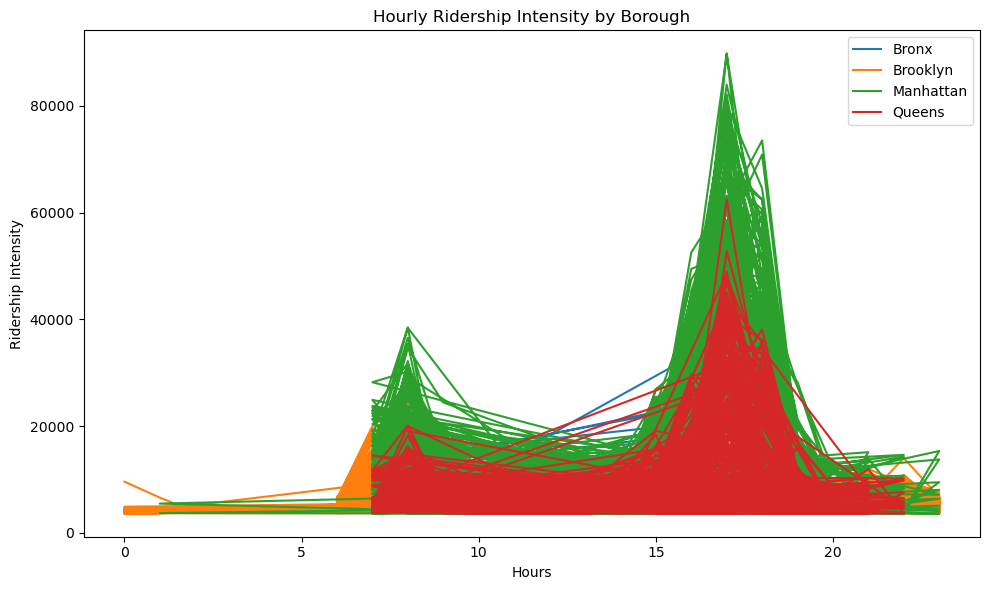

In [29]:
hourly_ridership = metro23.groupby(['borough', pd.Grouper(key='transit_timestamp', freq='H')])['ridership'].sum().reset_index()

plt.figure(figsize=(10, 6))

for borough in hourly_ridership['borough'].unique():
    data = hourly_ridership[hourly_ridership['borough'] == borough]
    hours = pd.to_datetime(data['transit_timestamp']).dt.hour
    plt.plot(hours, data['ridership'], label=borough)

plt.xlabel('Hours')
plt.ylabel('Ridership Intensity')
plt.title('Hourly Ridership Intensity by Borough')
plt.legend()
plt.tight_layout()

plt.savefig('/Users/alperenkaya/MyProjects/MTAmetroproject/Hourly Ridership Intensity by Borough.jpg')

plt.show()


In [19]:
metro23["ridership"].describe()

count    2.279265e+06
mean     3.151670e+02
std      6.812860e+02
min      1.000000e+00
25%      3.500000e+01
50%      1.250000e+02
75%      3.340000e+02
max      2.556500e+04
Name: ridership, dtype: float64

In [20]:
metro23 = metro23[metro23['ridership'] > 3600]
metro23

,transit_timestamp,station_complex,borough,ridership,month,dayname,hour
10577,2023-07-04 22:00:00,1 Av (L),Manhattan,3724,7,Tuesday,22
25123,2023-06-13 07:00:00,103 St-Corona Plaza (7),Manhattan,3606,6,Tuesday,7
124353,2023-03-02 18:00:00,"14 St (A,C,E)/8 Av (L)",Queens,4040,3,Thursday,18
124392,2023-06-29 18:00:00,"14 St (A,C,E)/8 Av (L)",Queens,3917,6,Thursday,18
124577,2023-01-04 17:00:00,"14 St (A,C,E)/8 Av (L)",Queens,3973,1,Wednesday,17
...,...,...,...,...,...,...,...
2149447,2023-03-02 23:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,3841,3,Thursday,23
2149448,2023-07-30 12:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,5493,7,Sunday,12
2208921,2023-06-25 16:00:00,"West 4 St-Washington Sq (A,B,C,D,E,F,M)",Brooklyn,3766,6,Sunday,16
2212731,2023-04-20 17:00:00,"West 4 St-Washington Sq (A,B,C,D,E,F,M)",Brooklyn,3669,4,Thursday,17


/var/folders/9p/y0bn8nh52v91g_14fnqyl9v00000gn/T/ipykernel_34156/4262676020.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = ridership_heatmap.pivot('dayname','borough', 'ridership')


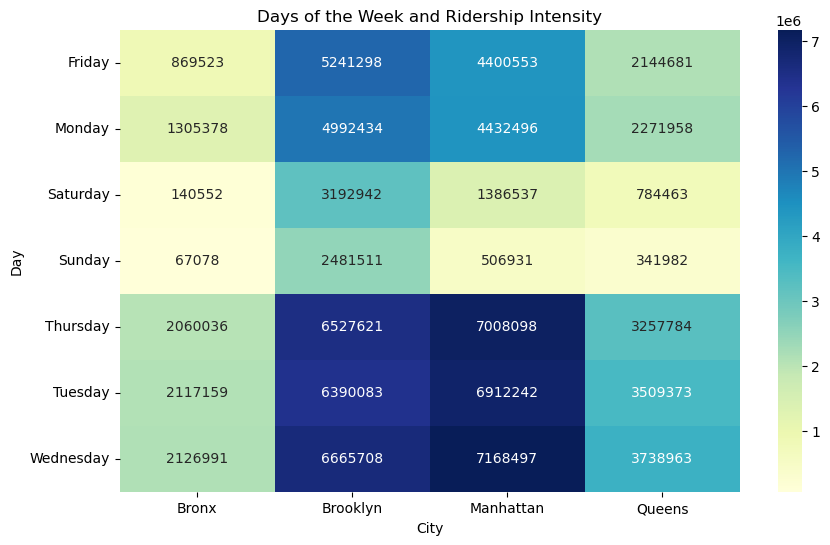

In [30]:
#Calculating Days of the Week and Ridership Intensity.
ridership_heatmap = metro23.groupby(['dayname','borough'])['ridership'].sum().reset_index()

#Applied heatmap.
heatmap_data = ridership_heatmap.pivot('dayname','borough', 'ridership')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.xlabel('City')
plt.ylabel('Day')
plt.title('Days of the Week and Ridership Intensity')

plt.savefig('/Users/alperenkaya/MyProjects/MTAmetroproject/Days of the Week and Ridership Intensity.jpg')

plt.show()



In [22]:
station_group = metro23.groupby(['station_complex', 'borough'])['ridership'].sum().reset_index().sort_values('ridership', ascending=False)
station_group.head(10)

,station_complex,borough,ridership
81,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,30904326
65,"Grand Central-42 St (S,4,5,6,7)",Queens,8134274
12,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,6583386
64,"Grand Central-42 St (S,4,5,6,7)",Manhattan,5481415
6,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",Manhattan,4211504
7,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",Queens,2705921
28,"59 St-Columbus Circle (A,B,C,D,1)",Bronx,2248529
62,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1959745
51,"Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortla...",Manhattan,1713585
17,"34 St-Penn Station (A,C,E)",Bronx,1676040


In [23]:
sq_42 = metro23[metro23.station_complex == 'Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)']
sq_42 = sq_42.sort_values(by='ridership', ascending=False)
sq_42 = sq_42.reset_index(drop=True).sort_values(['month', 'dayname', 'hour']).reset_index(drop=True)
sq_42

,transit_timestamp,station_complex,borough,ridership,month,dayname,hour
0,2023-01-20 06:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,5635,1,Friday,6
1,2023-01-06 06:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,5610,1,Friday,6
2,2023-01-13 06:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,5438,1,Friday,6
3,2023-01-27 06:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,5415,1,Friday,6
4,2023-01-20 07:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,7539,1,Friday,7
...,...,...,...,...,...,...,...
3791,2023-08-09 22:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,8074,8,Wednesday,22
3792,2023-08-16 22:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,7693,8,Wednesday,22
3793,2023-08-09 23:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,5173,8,Wednesday,23
3794,2023-08-02 23:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Brooklyn,4963,8,Wednesday,23


In [24]:
metro23['daynumber'] = metro23['dayname'].map({
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6
})
metro23.head(10)

,transit_timestamp,station_complex,borough,ridership,month,dayname,hour,daynumber
10577,2023-07-04 22:00:00,1 Av (L),Manhattan,3724,7,Tuesday,22,1
25123,2023-06-13 07:00:00,103 St-Corona Plaza (7),Manhattan,3606,6,Tuesday,7,1
124353,2023-03-02 18:00:00,"14 St (A,C,E)/8 Av (L)",Queens,4040,3,Thursday,18,3
124392,2023-06-29 18:00:00,"14 St (A,C,E)/8 Av (L)",Queens,3917,6,Thursday,18,3
124577,2023-01-04 17:00:00,"14 St (A,C,E)/8 Av (L)",Queens,3973,1,Wednesday,17,2
124584,2023-03-01 17:00:00,"14 St (A,C,E)/8 Av (L)",Queens,4379,3,Wednesday,17,2
124752,2023-04-19 18:00:00,"14 St (A,C,E)/8 Av (L)",Queens,3794,4,Wednesday,18,2
124768,2023-07-31 17:00:00,"14 St (A,C,E)/8 Av (L)",Queens,3694,7,Monday,17,0
124799,2023-05-17 16:00:00,"14 St (A,C,E)/8 Av (L)",Queens,3643,5,Wednesday,16,2
124812,2023-03-30 18:00:00,"14 St (A,C,E)/8 Av (L)",Queens,4027,3,Thursday,18,3


In [25]:
sq_42_day = pd.DataFrame(sq_42.groupby('dayname')['ridership'].mean().astype(int))
sq_42_day

,ridership
dayname,
Friday,8014
Monday,7857
Saturday,6594
Sunday,5605
Thursday,9235
Tuesday,9223
Wednesday,9551


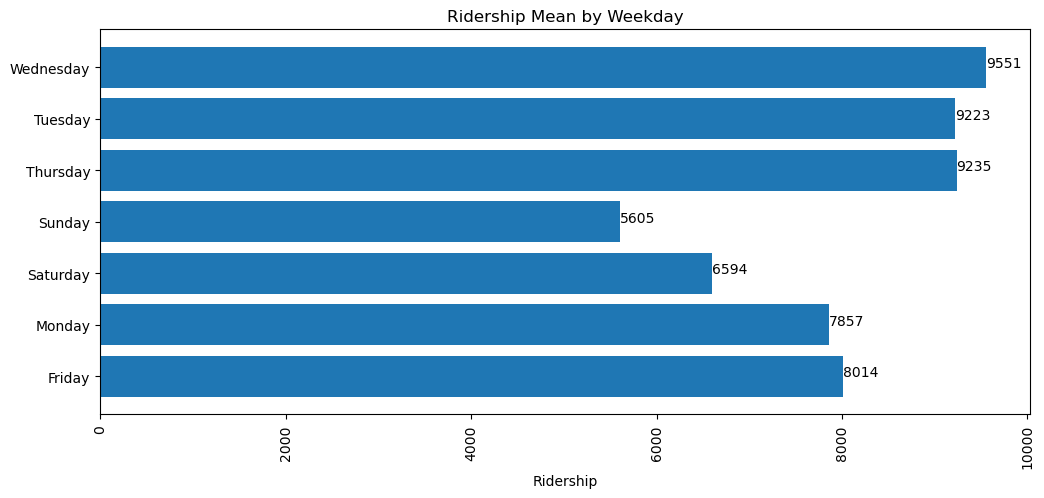

In [31]:
weekdays = np.array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'])


plt.figure(figsize = [12,5])
plt.title('Ridership Mean by Weekday')
plt.xlabel('Ridership')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, sq_42_day.ridership)

for index, value in enumerate(sq_42_day.ridership):
    plt.text(value, index, str(value))
plt.savefig('/Users/alperenkaya/MyProjects/MTAmetroproject/Ridership Mean by Weekday.jpg')
